# Explore downloaded season event data

In [15]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
# tqdm
from tqdm import tqdm
from glob import glob

In [16]:
columns_to_keep = [
    # "clientId",
    # "clientType",
    "fixtureId",
    "organizationId",
    # "received",
    # "sport",
    # "topic",
    "type",
    "data.class",
    "data.eventId",
    "data.eventTime",
    "data.eventType",
    # "data.options.attendance",
    # "data.options.numberOfPeriods",
    # "data.options.periodLength",
    # "data.status",
    "data.subType",
    "data.timestamp",
    "data.entityId",
    # "data.options.active",
    "data.options.bib",
    # "data.options.captain",
    # "data.options.name",
    "data.options.position",
    "data.options.starter",
    # "data.personId",
    # "data.options.number",
    "data.periodId",
    "data.sequence",
    "score_home",
    "score_away",
    "data.playId",
    "data.clock",
    "data.options.goalKeeperId",
    "data.options.location",
    "data.success",
    "data.x",
    "data.y",
    "data.options.failureReason",
    "data.options.attackType",
    "data.options.value",
    "data.options.emptyNet",
    # "team.added",
    # "team.ageGroup",
    # "team.alternateVenueIds",
    # "team.codeLatin",
    "team.codeLocal",
    # "team.defaultVenueId",
    # "team.discipline",
    # "team.entityGroupId",
    "team.entityId",
    "team.externalId",
    # "team.gender",
    # "team.grade",
    # "team.historicalNames",
    # "team.internationalReference",
    # "team.nameFullLatin",
    "team.nameFullLocal",
    # "team.organizationId",
    # "team.representing",
    # "team.standard",
    # "team.status",
    # "team.updated",
    # "team.additionalNames.namePlaceLatin",
    # "team.additionalNames.namePlaceLocal",
    # "team.additionalNames.nameShortLatin",
    # "team.additionalNames.nameShortLocal",
    "team.colors.primary",
    "team.colors.secondary",
    "team.colors.tertiary",
    # "team.contacts.email",
    # "team.contacts.fax",
    # "team.contacts.phone",
    # "team.entityGroup.id",
    # "team.entityGroup.resourceType",
    # "team.organization.id",
    # "team.organization.resourceType",
    # "player.added",
    # "player.deceased",
    "player.dob",
    "player.externalId",
    "player.gender",
    # "player.historicalNames",
    # "player.languageLocal",
    # "player.nameAbbreviated",
    # "player.nameFamilyLatin",
    "player.nameFamilyLocal",
    # "player.nameFullLatin",
    # "player.nameFullLocal",
    # "player.nameGivenLatin",
    "player.nameGivenLocal",
    "player.nationality",
    # "player.organizationId",
    "player.personId",
    # "player.representing",
    # "player.status",
    # "player.updated",
    "player.additionalDetails.height",
    "player.additionalDetails.weight",
    # "player.organization.id",
    # "player.organization.resourceType",
    "team_home_abbr",
    "team_away_abbr",
    "team_home_id",
    "team_away_id",
    "team_home_name",
    "team_away_name",
    "gameday",
    "team_attacking_id",
    "team_attacking_name",
    "team_attacking_side",
]

In [17]:
df = pd.DataFrame()



for file in tqdm(glob("../data/season_24_25/*.csv", recursive=True), desc="Processing files"):
    df_temp = pd.read_csv(file)
    df_temp["source"] = os.path.basename(file).split(".")[0]
    df = pd.concat([df, df_temp], ignore_index=True)


Processing files: 100%|██████████| 304/304 [00:06<00:00, 49.29it/s]


In [18]:
print(f"Total columns: {len(df.columns)}")
print(f"Total rows: {len(df)}")
display(df.columns)
# length = len(df)
# columns len
df_bak = df.copy()

Total columns: 55
Total rows: 148907


Index(['fixtureId', 'organizationId', 'type', 'data.class', 'data.eventId',
       'data.eventTime', 'data.eventType', 'data.subType', 'data.timestamp',
       'data.entityId', 'data.options.bib', 'data.options.position',
       'data.options.starter', 'data.periodId', 'data.sequence', 'score_home',
       'score_away', 'data.playId', 'data.clock', 'data.options.goalKeeperId',
       'data.options.location', 'data.success', 'data.x', 'data.y',
       'data.options.failureReason', 'data.options.attackType',
       'data.options.value', 'data.options.emptyNet', 'team.codeLocal',
       'team.entityId', 'team.externalId', 'team.nameFullLocal',
       'team.colors.primary', 'team.colors.secondary', 'team.colors.tertiary',
       'player.dob', 'player.externalId', 'player.gender',
       'player.nameFamilyLocal', 'player.nameGivenLocal', 'player.nationality',
       'player.personId', 'player.additionalDetails.height',
       'player.additionalDetails.weight', 'team_home_abbr', 'team_away_a

In [19]:
df = df_bak.copy()
# how many entries are there for data.type = fixture and data.subtype = end?
df = df[df["data.eventType"] == "fixture"]
df = df[df["data.subType"] == "end"]
# if multiple fixtureID in df, take the last one
df = df.groupby("fixtureId").last().reset_index()


print(f"Total columns after filtering: {len(df.columns)}")
print(f"Total rows after filtering: {len(df)}")

Total columns after filtering: 55
Total rows after filtering: 304


In [20]:
def get_points(home, away):
    if home > away: return (2, 0)
    if home < away: return (0, 2)
    return (1, 1)


results = []

for _, row in df.iterrows():
    date = pd.to_datetime(row['data.eventTime'])
    gameday = int(row['gameday'])
    home, away = row['team_home_name'], row['team_away_name']
    s_home, s_away = row['score_home'], row['score_away']
    p_home, p_away = get_points(s_home, s_away)
    results.extend([
        {'date': gameday, 'team': home, 'points': p_home},
        {'date': gameday, 'team': away, 'points': p_away},
    ])
df_long = pd.DataFrame(results)


df_pivot = df_long.sort_values('date').groupby(['team', 'date']).sum().groupby(level=0).cumsum().reset_index()
df_race = df_pivot.pivot(index='date', columns='team', values='points').fillna(method='ffill').fillna(0)

display(df_race)

# Mapping Teamname -> color
team_color_map = (
    df[['team.nameFullLocal', 'team.colors.primary']]
    .dropna()
    .drop_duplicates()
    .set_index('team.nameFullLocal')['team.colors.primary']
    .to_dict()
)



C:\Users\madam\AppData\Local\Temp\ipykernel_23308\1560768403.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_race = df_pivot.pivot(index='date', columns='team', values='points').fillna(method='ffill').fillna(0)


team,1. VfL Potsdam,FRISCH AUF! Göppingen,Füchse Berlin,HC Erlangen,HSG Wetzlar,Handball Sport Verein Hamburg,MT Melsungen,Rhein-Neckar Löwen,SC DHfK Leipzig,SC Magdeburg,SG BBM Bietigheim,SG Flensburg-Handewitt,TBV Lemgo Lippe,THW Kiel,TSV Hannover-Burgdorf,TVB Stuttgart,ThSV Eisenach,VfL Gummersbach
date,,,,,,,,,,,,,,,,,,
1,0.0,1.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,1.0,4.0,0.0,0.0,1.0,4.0,4.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0,0.0,2.0,2.0
3,0.0,1.0,4.0,0.0,0.0,3.0,4.0,6.0,4.0,4.0,4.0,6.0,4.0,4.0,4.0,2.0,2.0,2.0
4,0.0,1.0,6.0,0.0,2.0,5.0,6.0,6.0,6.0,6.0,4.0,8.0,4.0,4.0,6.0,2.0,2.0,4.0
5,0.0,1.0,8.0,2.0,2.0,5.0,8.0,8.0,6.0,8.0,4.0,9.0,6.0,6.0,8.0,2.0,2.0,5.0
6,0.0,2.0,10.0,2.0,2.0,5.0,10.0,8.0,8.0,10.0,4.0,9.0,8.0,8.0,10.0,2.0,4.0,6.0
7,0.0,4.0,10.0,2.0,4.0,5.0,12.0,10.0,8.0,12.0,4.0,9.0,10.0,10.0,12.0,2.0,4.0,8.0
8,0.0,4.0,12.0,2.0,4.0,6.0,13.0,10.0,9.0,14.0,4.0,11.0,12.0,12.0,13.0,2.0,6.0,10.0
9,0.0,6.0,14.0,2.0,4.0,6.0,15.0,10.0,9.0,16.0,6.0,13.0,12.0,12.0,15.0,2.0,8.0,12.0


In [21]:
import bar_chart_race as bcr

# Reihenfolge der Teams wie in df_race.columns
team_colors = [team_color_map.get(team, '#999999') for team in df_race.columns]

colors_in_order = [team_color_map.get(team, '#999999') for team in df_race.columns]


bcr.bar_chart_race(
    df=df_race,
    filename='handball_race2.mp4',
    orientation='h',
    sort='desc',
    n_bars=18,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    period_length=750,
    interpolate_period=False,
    label_bars=True,
    bar_size=0.95,
    period_label=True,
    figsize=(6, 6),
    dpi=144,
    title='Handball Team Rankings (Tore über Zeit)'
)



c:\dev\SportradarDatacoreAPI\.venv\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
c:\dev\SportradarDatacoreAPI\.venv\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
c:\dev\SportradarDatacoreAPI\.venv\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


⚙️ Anzahl verarbeiteter Spiele: 304
⚠️ Fehlerhafte/übersprungene Zeilen: 0
📌 Einzigartige Teams: ['BER', 'EIS', 'FAG', 'GUM', 'HAN', 'HCE', 'HSV', 'LEI', 'MTM', 'POT', 'RNL', 'SCM', 'SGB', 'SGF', 'TBV', 'THW', 'TVB', 'WET']
🧮 Torverteilung (Heimteams):
count    304.000000
mean      30.036184
std        4.835445
min       18.000000
25%       26.000000
50%       30.000000
75%       33.000000
max       45.000000
Name: score_home, dtype: float64
🧮 Torverteilung (Auswärtsteams):
count    304.000000
mean      28.838816
std        4.601299
min       15.000000
25%       25.750000
50%       29.000000
75%       32.000000
max       43.000000
Name: score_away, dtype: float64

🏆 Punktetabelle (gesamt):
team
BER    58
SCM    57
MTM    54
SGF    47
THW    47
HAN    44
GUM    40
TBV    39
RNL    36
HSV    35
EIS    27
FAG    24
LEI    22
WET    19
TVB    18
HCE    18
SGB    17
POT     6
Name: points, dtype: int64


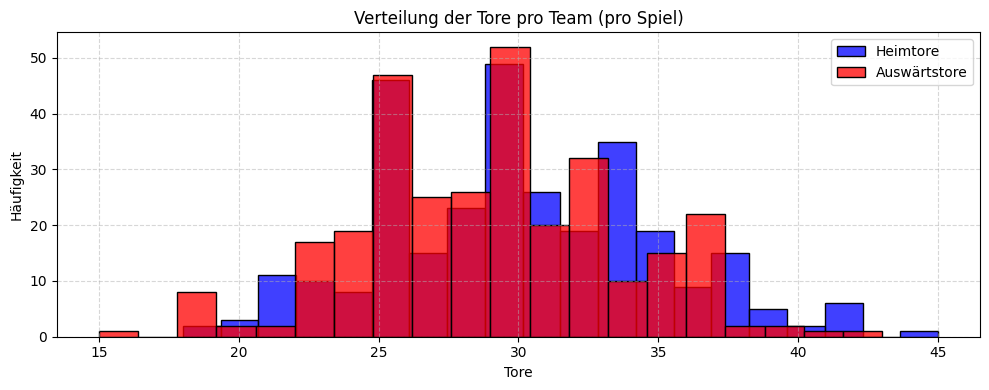

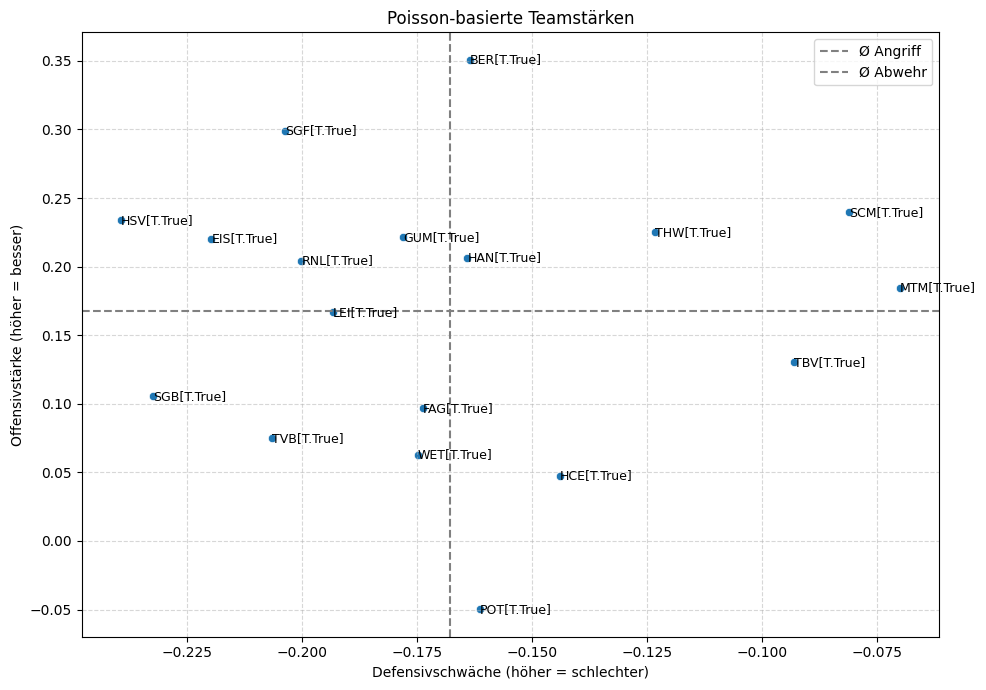

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# --- Punktelogik & Ergebnisextraktion ---
def get_points(home, away):
    if home > away: return (2, 0)
    if home < away: return (0, 2)
    return (1, 1)

results = []
matches = []
failures = 0

for _, row in df.iterrows():
    try:
        home = row['team_home_abbr']
        away = row['team_away_abbr']
        s_home = int(row['score_home'])
        s_away = int(row['score_away'])
        fixture_id = row['fixtureId']

        if pd.isna(home) or pd.isna(away): continue

        matches.append({
            'fixtureId': fixture_id,
            'team_home_abbr': home,
            'team_away_abbr': away,
            'score_home': s_home,
            'score_away': s_away
        })

        p_home, p_away = get_points(s_home, s_away)
        results.extend([
            {'fixtureId': fixture_id, 'team': home, 'points': p_home},
            {'fixtureId': fixture_id, 'team': away, 'points': p_away},
        ])
    except Exception as e:
        failures += 1
        continue

df_model = pd.DataFrame(matches)
df_points = pd.DataFrame(results)

# --- Debug-Ausgabe ---
print("⚙️ Anzahl verarbeiteter Spiele:", len(df_model))
print("⚠️ Fehlerhafte/übersprungene Zeilen:", failures)
print("📌 Einzigartige Teams:", sorted(set(df_model['team_home_abbr']) | set(df_model['team_away_abbr'])))
print("🧮 Torverteilung (Heimteams):")
print(df_model['score_home'].describe())
print("🧮 Torverteilung (Auswärtsteams):")
print(df_model['score_away'].describe())

# --- Punkteübersicht
print("\n🏆 Punktetabelle (gesamt):")
print(df_points.groupby('team')['points'].sum().sort_values(ascending=False))

# --- Histogramm der Tore
plt.figure(figsize=(10,4))
sns.histplot(df_model['score_home'], bins=20, color='blue', label='Heimtore', kde=False)
sns.histplot(df_model['score_away'], bins=20, color='red', label='Auswärtstore', kde=False)
plt.title("Verteilung der Tore pro Team (pro Spiel)")
plt.xlabel("Tore")
plt.ylabel("Häufigkeit")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Poisson-Modell ---
def fit_poisson_team_model(df: pd.DataFrame):
    home = df[['team_home_abbr', 'team_away_abbr', 'score_home']].copy()
    home.columns = ['team', 'opponent', 'goals']
    home['home'] = 1

    away = df[['team_away_abbr', 'team_home_abbr', 'score_away']].copy()
    away.columns = ['team', 'opponent', 'goals']
    away['home'] = 0

    data = pd.concat([home, away], ignore_index=True)
    data = pd.get_dummies(data, columns=['team', 'opponent'], drop_first=False)
    data.columns = data.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)

    team_cols = [c for c in data.columns if c.startswith('team_')]
    opp_cols = [c for c in data.columns if c.startswith('opponent_')]
    formula = "goals ~ home + " + " + ".join(team_cols + opp_cols)

    model = smf.glm(formula=formula, data=data, family=sm.families.Poisson()).fit()
    return model

# --- Ratings extrahieren ---
def extract_team_strengths(model):
    params = model.params
    off = {k.replace('team_', ''): v for k, v in params.items() if k.startswith('team_')}
    deff = {k.replace('opponent_', ''): -v for k, v in params.items() if k.startswith('opponent_')}
    teams = sorted(set(off) | set(deff))
    return pd.DataFrame({
        'team': teams,
        'offense': [off.get(t, 0) for t in teams],
        'defense': [deff.get(t, 0) for t in teams]
    })

# --- Plot ---
def plot_team_strengths(df_strength):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='defense', y='offense', data=df_strength)
    for _, row in df_strength.iterrows():
        plt.text(row['defense'], row['offense'], row['team'], fontsize=9, ha='left', va='center')
    plt.axhline(df_strength['offense'].mean(), linestyle='--', color='gray', label='Ø Angriff')
    plt.axvline(df_strength['defense'].mean(), linestyle='--', color='gray', label='Ø Abwehr')
    plt.xlabel('Defensivschwäche (höher = schlechter)')
    plt.ylabel('Offensivstärke (höher = besser)')
    plt.title('Poisson-basierte Teamstärken')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Ausführung ---
model = fit_poisson_team_model(df_model)
df_strength = extract_team_strengths(model)
plot_team_strengths(df_strength)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from patsy.contrasts import Treatment
from scipy.stats import poisson
from collections import defaultdict
import itertools
import statsmodels.api as sm

# --- Step 1: Prepare team-level dataset ---
def build_poisson_model(df_model):
    home = df_model[['team_home_abbr', 'team_away_abbr', 'score_home']].copy()
    home.columns = ['team', 'opponent', 'goals']
    home['home'] = 1

    away = df_model[['team_away_abbr', 'team_home_abbr', 'score_away']].copy()
    away.columns = ['team', 'opponent', 'goals']
    away['home'] = 0

    df_all = pd.concat([home, away], ignore_index=True)

    # Set fixed reference team (e.g., RNL)
    df_all['team'] = pd.Categorical(df_all['team'], categories=sorted(df_model['team_home_abbr'].unique()))
    df_all['opponent'] = pd.Categorical(df_all['opponent'], categories=sorted(df_model['team_home_abbr'].unique()))

    formula = "goals ~ home + C(team, Treatment(reference='RNL')) + C(opponent, Treatment(reference='RNL'))"
    model = smf.glm(formula=formula, data=df_all, family=sm.families.Poisson()).fit()
    return model

# --- Step 2: Predict expected goals for team matchups ---
def expected_goals(team1, team2, model):
    params = model.params
    intercept = params.get("Intercept", 0.0)

    atk_key = f"C(team, Treatment(reference='RNL'))[T.{team1}]"
    def_key = f"C(opponent, Treatment(reference='RNL'))[T.{team2}]"
    atk1 = params.get(atk_key, 0.0)
    def2 = params.get(def_key, 0.0)
    mu1 = np.exp(intercept + atk1 + def2 + 1.0)

    atk_key = f"C(team, Treatment(reference='RNL'))[T.{team2}]"
    def_key = f"C(opponent, Treatment(reference='RNL'))[T.{team1}]"
    atk2 = params.get(atk_key, 0.0)
    def1 = params.get(def_key, 0.0)
    mu2 = np.exp(intercept + atk2 + def1 + 0.0)

    return mu1, mu2

# --- Step 3: Simulate match outcome probabilities ---
def simulate_match(mu1, mu2, max_goals=50):
    probs = np.zeros((max_goals, max_goals))
    for x in range(max_goals):
        for y in range(max_goals):
            probs[x, y] = poisson.pmf(x, mu1) * poisson.pmf(y, mu2)

    p_home_win = np.sum(np.tril(probs, -1))
    p_draw = np.sum(np.diag(probs))
    p_away_win = np.sum(np.triu(probs, 1))

    return {
        'home_win_prob': p_home_win,
        'draw_prob': p_draw,
        'away_win_prob': p_away_win
    }

# --- Step 4: Predict all fixtures ---
def predict_all_matchups(teams, model):
    fixtures = []
    for home, away in itertools.permutations(teams, 2):
        mu_home, mu_away = expected_goals(home, away, model)
        probs = simulate_match(mu_home, mu_away)

        fixtures.append({
            'home': home,
            'away': away,
            'exp_goals_home': mu_home,
            'exp_goals_away': mu_away,
            **probs
        })

    return pd.DataFrame(fixtures)

# --- Step 5: Expected points table ---
def expected_points_table(fixtures_df):
    pts = defaultdict(float)
    for _, row in fixtures_df.iterrows():
        pts[row['home']] += 2 * row['home_win_prob'] + 1 * row['draw_prob']
        pts[row['away']] += 2 * row['away_win_prob'] + 1 * row['draw_prob']
    return pd.DataFrame({'team': list(pts.keys()), 'expected_points': list(pts.values())}).sort_values('expected_points', ascending=False)

# --- Run everything ---
model = build_poisson_model(df_model)
teams = sorted(df_model['team_home_abbr'].unique())
df_fixtures = predict_all_matchups(teams, model)
df_exp_pts = expected_points_table(df_fixtures)

# --- Display ---
print("🔢 Top 10 matchups with highest home win probability:")
display(df_fixtures.sort_values('home_win_prob', ascending=False).head(10))

print("\n📊 Expected Points Table:")
display(df_exp_pts)


AttributeError: module 'statsmodels.formula.api' has no attribute 'families'

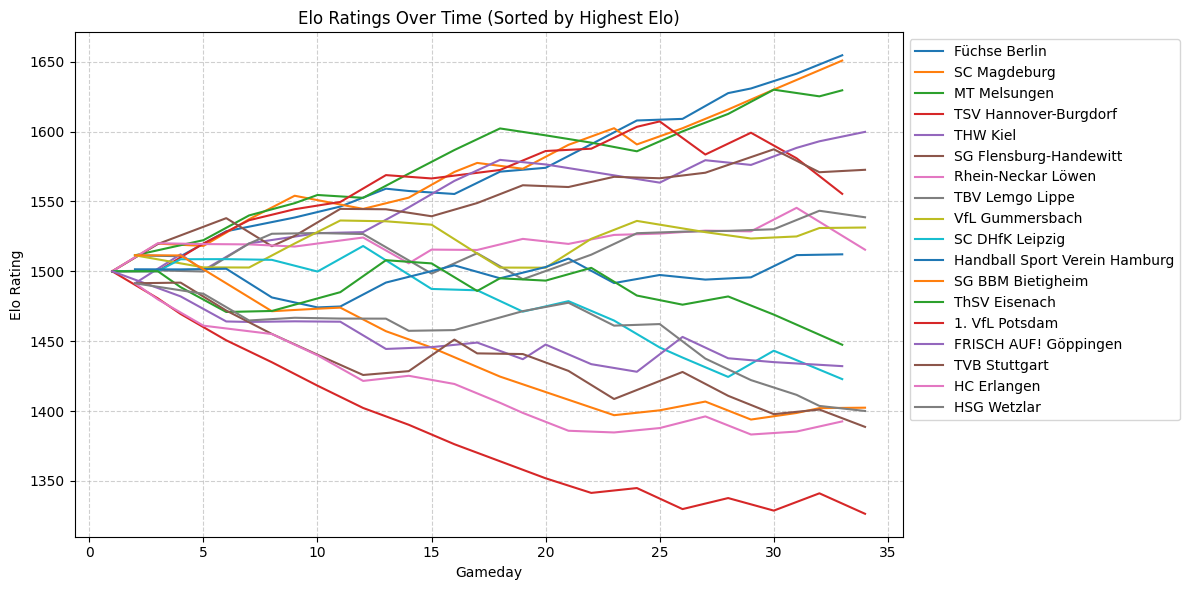

In [ ]:
from collections import defaultdict

def expected_score(r1, r2):
    return 1 / (1 + 10 ** ((r2 - r1) / 400))

def update_elo(r, expected, actual, k=20):
    return r + k * (actual - expected)

def compute_elo_predictions(
    df: pd.DataFrame,
    k: float = 20,
    initial: float = 1500,
    home_adv: float = 0
) -> pd.DataFrame:
    elo = defaultdict(lambda: initial)
    predictions = []

    for _, row in df.sort_values('gameday').iterrows():
        day = int(row['gameday'])
        home, away = row['team_home_name'], row['team_away_name']
        s_h, s_a = row['score_home'], row['score_away']

        actual = 1.0 if s_h > s_a else 0.5 if s_h == s_a else 0.0

        r_h = elo[home] + home_adv
        r_a = elo[away]
        expected = expected_score(r_h, r_a)

        predictions.append({
            'gameday': day,
            'team_home': home,
            'team_away': away,
            'elo_home': r_h - home_adv,
            'elo_away': r_a,
            'expected_home_win_prob': expected,
            'actual_result': actual
        })

        elo[home] = update_elo(r_h, expected, actual, k) - home_adv
        elo[away] = update_elo(r_a, 1 - expected, 1 - actual, k)

    return pd.DataFrame(predictions)

def plot_elo(df_pred):
    # Sort teams by their highest Elo rating
    sorted_teams = df_pred.groupby('team_home')['elo_home'].max().sort_values(ascending=False).index

    plt.figure(figsize=(12, 6))
    for team in sorted_teams:
        team_elo = df_pred[df_pred['team_home'] == team][['gameday', 'elo_home']].drop_duplicates()
        plt.plot(team_elo['gameday'], team_elo['elo_home'], label=team)
    plt.title("Elo Ratings Over Time (Sorted by Highest Elo)")
    plt.xlabel("Gameday")
    plt.ylabel("Elo Rating")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# --- Hier wird df_pred erzeugt ---
df_pred = compute_elo_predictions(df, k=20, initial=1500, home_adv=50)
plot_elo(df_pred)



Elo Prediction Evaluation

ROC AUC:        0.823  (Discrimination)
LogLoss:        0.583  (Probability Quality)
Brier Score:    0.197  (Quadratic Error)
ECE:            0.114  (Calibration Quality)


C:\Users\madam\AppData\Local\Temp\ipykernel_23308\206590043.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('prob_bin')


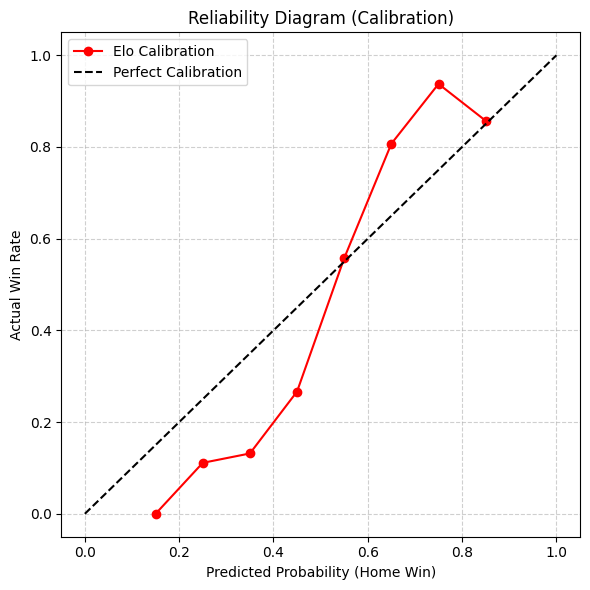

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, log_loss, brier_score_loss

# Zielvariable binär kodieren (nur Heimsiege vs. keine Heimsiege)
y_true = (df_pred['actual_result'] == 1.0).astype(int)
y_prob = df_pred['expected_home_win_prob']

# === Klassifikationsmetriken ===
roc = roc_auc_score(y_true, y_prob)
ll = log_loss(y_true, y_prob)
brier = brier_score_loss(y_true, y_prob)

# === Expected Calibration Error (ECE) ===
def compute_ece(df, n_bins=10):
    bins = np.linspace(0, 1, n_bins + 1)
    df['prob_bin'] = pd.cut(df['expected_home_win_prob'], bins=bins)
    grouped = df.groupby('prob_bin')
    bin_conf = grouped['expected_home_win_prob'].mean()
    bin_acc = grouped['actual_result'].mean()
    bin_size = grouped.size().values
    ece = np.sum(np.abs(bin_conf - bin_acc) * bin_size) / bin_size.sum()
    return ece, bin_conf, bin_acc, bins

ece, bin_conf, bin_acc, bins = compute_ece(df_pred)

# === Metriken ausgeben ===
print("Elo Prediction Evaluation\n")
print(f"ROC AUC:        {roc:.3f}  (Discrimination)")
print(f"LogLoss:        {ll:.3f}  (Probability Quality)")
print(f"Brier Score:    {brier:.3f}  (Quadratic Error)")
print(f"ECE:            {ece:.3f}  (Calibration Quality)")

# Reliability Diagram
bin_centers = bins[:-1] + 0.05

plt.figure(figsize=(6, 6))
plt.plot(bin_centers, bin_acc, marker='o', label='Elo Calibration', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Predicted Probability (Home Win)')
plt.ylabel('Actual Win Rate')
plt.title('Reliability Diagram (Calibration)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



🔴 Elo Original
  ROC AUC:     0.823
  LogLoss:     0.583
  Brier Score: 0.197

🟢 Platt Scaling
  ROC AUC:     0.823
  LogLoss:     0.571
  Brier Score: 0.192


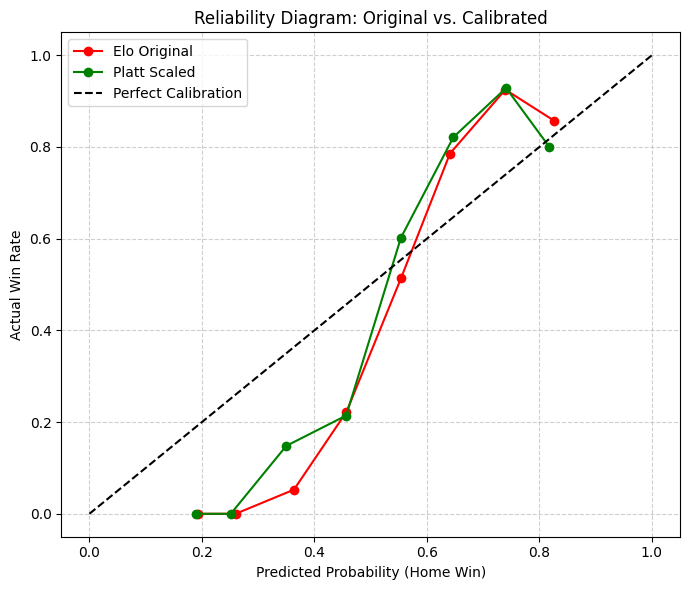

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, log_loss, brier_score_loss
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

# Zielvariable binär kodieren
y_true = (df_pred['actual_result'] == 1.0).astype(int)
y_prob = df_pred['expected_home_win_prob'].values.reshape(-1, 1)

# === Platt Scaling (Logistische Nachkalibrierung) ===
platt = LogisticRegression(solver='lbfgs')
platt.fit(y_prob, y_true)
y_prob_cal = platt.predict_proba(y_prob)[:, 1]

# === Metriken Original vs. Kalibriert ===
def report_metrics(y_true, y_pred, label):
    roc = roc_auc_score(y_true, y_pred)
    ll = log_loss(y_true, y_pred)
    brier = brier_score_loss(y_true, y_pred)
    print(f"\n{label}")
    print(f"  ROC AUC:     {roc:.3f}")
    print(f"  LogLoss:     {ll:.3f}")
    print(f"  Brier Score: {brier:.3f}")

report_metrics(y_true, y_prob.flatten(), "🔴 Elo Original")
report_metrics(y_true, y_prob_cal, "🟢 Platt Scaling")

# === Calibration Data für beide Varianten ===
prob_true_orig, prob_pred_orig = calibration_curve(y_true, y_prob.flatten(), n_bins=10, strategy='uniform')
prob_true_cal, prob_pred_cal = calibration_curve(y_true, y_prob_cal, n_bins=10, strategy='uniform')

# === Plot ===
plt.figure(figsize=(7, 6))
plt.plot(prob_pred_orig, prob_true_orig, 'o-', label='Elo Original', color='red')
plt.plot(prob_pred_cal, prob_true_cal, 'o-', label='Platt Scaled', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')

plt.xlabel('Predicted Probability (Home Win)')
plt.ylabel('Actual Win Rate')
plt.title('Reliability Diagram: Original vs. Calibrated')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


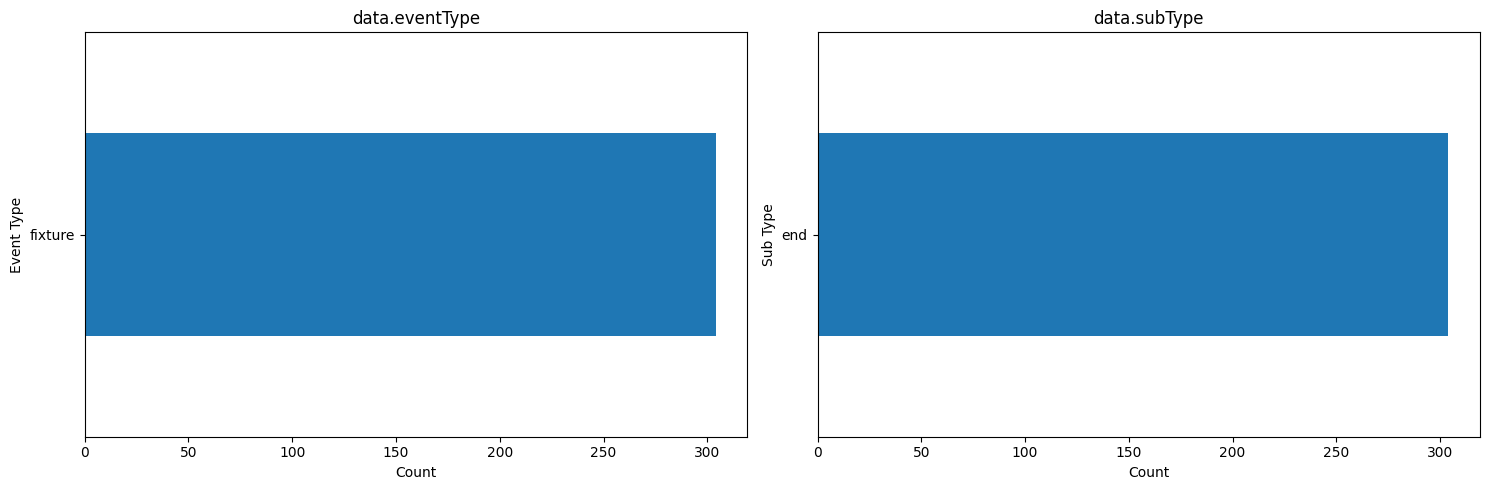

In [24]:
# Histogram of 'data.eventType' and 'data.subType'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df["data.eventType"].value_counts().plot(kind="barh", ax=ax[0])
df["data.subType"].value_counts().plot(kind="barh", ax=ax[1])
ax[0].set_title("data.eventType")
ax[1].set_title("data.subType")
ax[0].set_ylabel("Event Type")
ax[1].set_ylabel("Sub Type")
ax[0].set_xlabel("Count")
ax[1].set_xlabel("Count")
plt.tight_layout()
# plt.savefig("eventType_subType.png")
plt.show()

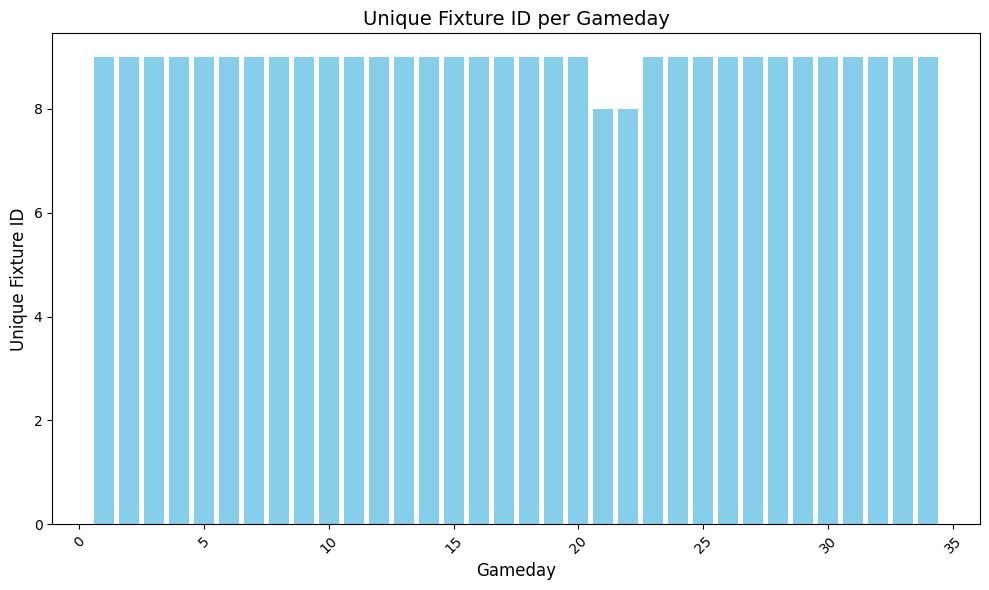

In [25]:
# Display unique values of fixtureId per gameday
def unique_fixtureid_per_gameday(df):
    fixtureid_counts = df.groupby("gameday")["fixtureId"].nunique()
    return fixtureid_counts

fixtureid_counts = unique_fixtureid_per_gameday(df)
fixtureid_counts = fixtureid_counts.reset_index()
fixtureid_counts.columns = ["data.gameday", "unique_fixtureid"]

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fixtureid_counts["data.gameday"], fixtureid_counts["unique_fixtureid"], color="skyblue")
ax.set_title("Unique Fixture ID per Gameday", fontsize=14)
ax.set_xlabel("Gameday", fontsize=12)
ax.set_ylabel("Unique Fixture ID", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import plotly.graph_objects as go

# Count occurrences
counts = df.groupby(["data.class", "data.eventType", "data.subType"]).size().reset_index(name="count")

# Collect all unique labels
labels = pd.concat([counts["data.class"], counts["data.eventType"], counts["data.subType"]]).unique().tolist()
label_indices = {label: i for i, label in enumerate(labels)}

# First flow: type → eventType
sources_type_event = counts["data.class"].map(label_indices)
targets_type_event = counts["data.eventType"].map(label_indices)
values_type_event = counts["count"]

# Second flow: eventType → subType
sources_event_sub = counts["data.eventType"].map(label_indices)
targets_event_sub = counts["data.subType"].map(label_indices)
values_event_sub = counts["count"]

# Combine both flows
sources = pd.concat([sources_type_event, sources_event_sub])
targets = pd.concat([targets_type_event, targets_event_sub])
values = pd.concat([values_type_event, values_event_sub])

# Plot Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=labels,
        line=dict(color="black", width=0.5)
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(
    title_text="Type → EventType → SubType Flow",
    font_size=10,
    height=800,
    width=700
)
fig.show()


In [27]:
import plotly.express as px

df_filtered = df[["data.class", "data.eventType", "data.subType"]].dropna()


fig = px.sunburst(
    df_filtered,
    path=["data.class", "data.eventType", "data.subType"],
    values=None,  # or use a 'count' column if pre-aggregated
    title="Class → EventType → SubType Hierarchy"
)
fig.update_layout(margin=dict(t=40, l=10, r=10, b=10))
fig.show()

fig = px.treemap(
    df_filtered,
    path=["data.class", "data.eventType", "data.subType"],
    values=None,  # or 'count'
    title="Class → EventType → SubType Treemap"
)
fig.update_layout(margin=dict(t=40, l=10, r=10, b=10))
fig.show()


fig = px.icicle(
    df_filtered,
    path=["data.class", "data.eventType", "data.subType"],
    values=None,
    title="Class → EventType → SubType Icicle"
)
fig.update_layout(margin=dict(t=40, l=10, r=10, b=10))
fig.show()



C:\Users\madam\AppData\Local\Temp\ipykernel_23308\1848256278.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



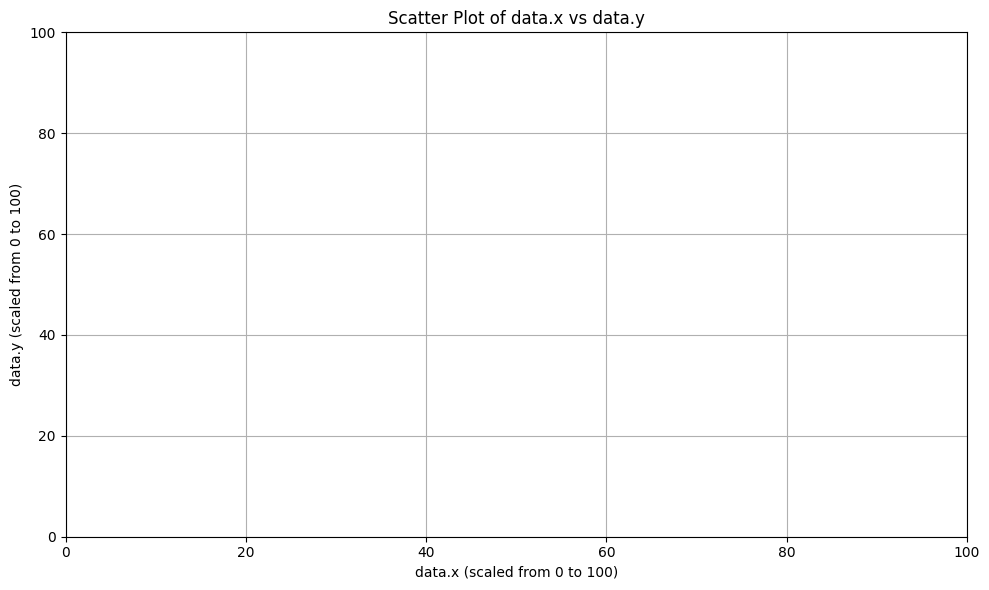

In [28]:
# Replace NaN values in 'data.success' with False (or any default value)
df["data.success"] = df["data.success"].fillna(False)

# Assign colors based on data.success
colors = df["data.success"].map({True: 'green', False: 'red'})

# Plot data.x and data.y as a scatter plot with colors based on data.success
plt.figure(figsize=(10, 6))
plt.scatter(df["data.x"], df["data.y"], alpha=0.5, s=10, c=colors)
plt.title("Scatter Plot of data.x vs data.y")
plt.xlabel("data.x (scaled from 0 to 100)")
plt.ylabel("data.y (scaled from 0 to 100)")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()